# Setup

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

from cbDetection.utils import text_cleaning as tc # custom text cleaning script

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pantheon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pantheon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pantheon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
We use the <a href="https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification">Cyberbullying Classification</a> dataset from Kaggle

## Content

* **tweet_text** - Text of the tweet
* **cyberbullying_type** - Type of cyberbullying harassment.


In [2]:
tweet_df = pd.read_csv("../data/cyberbullying_tweets.csv")
tweet_df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


In [3]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [4]:
# Check null values
tweet_df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

<Axes: >

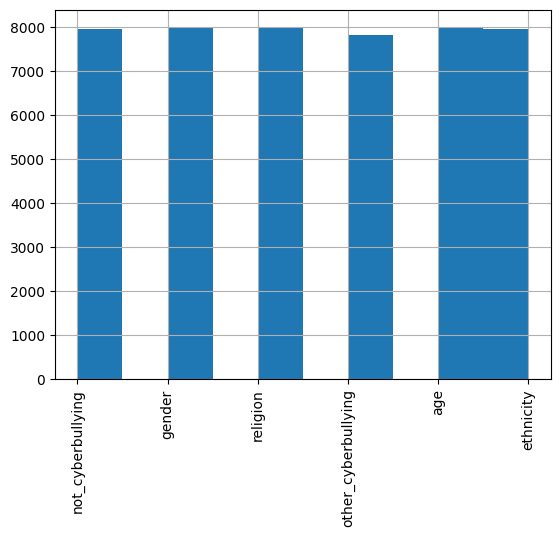

In [5]:
tweet_df["cyberbullying_type"].hist(xrot=90)

In [6]:
# Remove duplicate rows
tweet_df = tweet_df.drop_duplicates()

# Sampling the dataset

In [7]:
not_cyberbullying_df = tweet_df[tweet_df['cyberbullying_type']=="not_cyberbullying"]
cyberbullying_df = tweet_df[tweet_df['cyberbullying_type']!="not_cyberbullying"]
cyberbullying_df_sampled = cyberbullying_df.sample(len(not_cyberbullying_df))

new_tweet_df = pd.concat([not_cyberbullying_df, cyberbullying_df_sampled], axis=0)
new_tweet_df = new_tweet_df.sample(frac=1).reset_index(drop=True) # shuffle dataset

<Axes: >

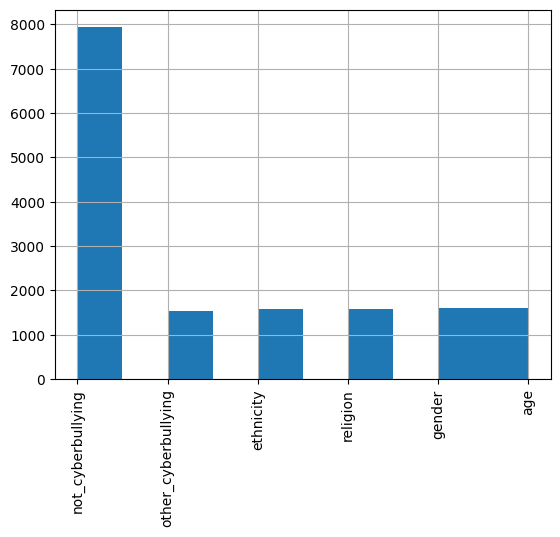

In [8]:
new_tweet_df["cyberbullying_type"].hist(xrot=90)

# Data cleaning

In [9]:
# Encode cyberbullying type
new_tweet_df["is_cyberbullying"] = [0 if x=="not_cyberbullying" else 1 for x in new_tweet_df["cyberbullying_type"]]

In [10]:
# Clean tweet text
new_tweet_df["cleaned_text"] = new_tweet_df["tweet_text"].apply(tc.clean_text)

In [11]:
new_tweet_df[['tweet_text', 'cleaned_text']]

,tweet_text,cleaned_text
0,"@SIMPLY_shamar lmao, you'd have had better opportunities in Science thou going to college",lmao better opportunity science thou going college
1,Spanish class was bomedy in high school lol,spanish class bomedy high school lol
2,@SuperSpacedad yeahh. I'm not going to retweet that. That chick is mentally unstable &amp; loves to post private convs. It's not OK.,yeahh going retweet chick mentally unstable love post private convs ok
3,@MaxBlumenthal @cpassevant @anadumitrescu13 Post-Hebdo? LOL. Events like it are a daily occurrence around the world. Why isolate one.,post hebdo lol event like daily occurrence around world isolate one
4,omg watching freebsd committers just rail at gamergaters for doubting my freebsd contributions,omg watching freebsd committers rail gamergaters doubting freebsd contribution
...,...,...
15869,'Bigger than Maccas' #MKR star &amp; paleo chef Pete Evans says his critics will eat humble pie http://t.co/PFMPvItedY http://t.co/kMaSD5I3p2,bigger maccas #mkr star paleo chef pete evans say critic eat humble pie
15870,@tdistjohn @_Kurda_ I'll have to settle for the 300 winchester mag I'm building.,settle winchester mag building
15871,To sofrendo bullying da minha internet,sofrendo bullying da minha internet
15872,So sick of being bullied :'( @chelsealudwig @alexanderludwig,sick bullied


In [12]:
# Save cleaned dataset
cleaned_df = new_tweet_df[['cleaned_text', 'is_cyberbullying']]
cleaned_df.to_csv("../data/cleaned_tweets.csv", index=False)